In [1]:
%cd ..

c:\Code\Armband


In [22]:
import numpy as np
import pandas as pd
import pickle
import random
import os
import importlib

#import keras_tuner as kt
from scipy import signal
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as layers
from tensorflow.keras.layers import GlobalMaxPooling2D, Activation, Dense, Conv1D, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization, GlobalMaxPooling1D
from tensorflow.keras import optimizers

%matplotlib inline
import matplotlib.pyplot as plt

from tensorflow.keras import regularizers



from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from utils.signal import DCFilter, normalize
from utils.visualize import showMe, showHistory, showAvg
from utils.augment import apply_augment


from utils.data import load_set, pre_process_set, format2train, shuffle
from utils.sampler_generator import SamplerGenerator

from utils.visualizer import Visualizer

%load_ext autoreload
%autoreload 2



from config.continous import settings

np.random.seed(42)
tf.keras.utils.set_random_seed(1)
#tf.config.experimental.enable_op_determinism()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading 9 sessions...
train_data\train\Ambrus\2022-10-13_13-25.npy
X_store shape: (8, 198438)
y_store shape: (2, 198438)
train_data\train\Ambrus\2022-10-13_13-32.npy
X_store shape: (8, 633797)
y_store shape: (2, 633797)
train_data\train\Erno\2022-10-13_14-01.npy
X_store shape: (8, 301710)
y_store shape: (2, 301710)
train_data\train\Nemes\2022-10-12_17-06.npy
X_store shape: (8, 501320)
y_store shape: (2, 501320)
train_data\train\Nemes\2022-10-13_12-47.npy
X_store shape: (8, 260303)
y_store shape: (2, 260303)
train_data\train\Peti\2022-10-13_16-14.npy
X_store shape: (8, 624009)
y_store shape: (2, 624009)
train_data\train\Szarvas\2022-10-14_11-42.npy
X_store shape: (8, 72926)
y_store shape: (2, 72926)
train_data\train\Szarvas\2022-10-14_11-45.npy
X_store shape: (8, 34744)
y_store shape: (2, 34744)
train_data\train\Szarvas\2022-10-14_11-46.npy
X_store shape: (8, 579079)
y_store shape: (2, 579079)
Loaded 9 sessions


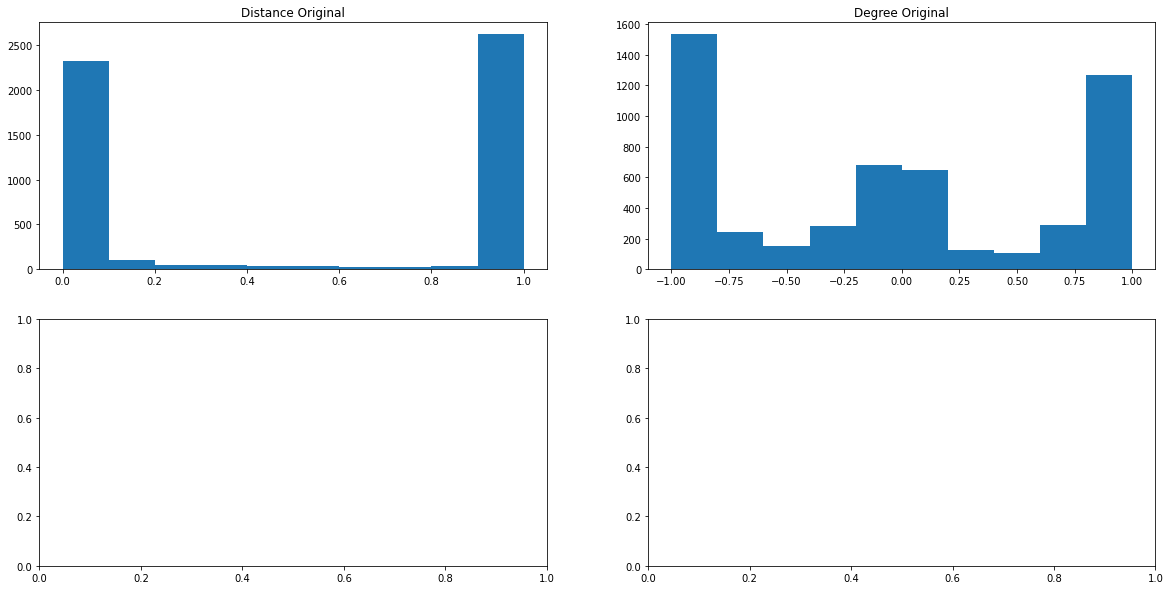

Dropped 134 samples. 5200 samples remaining
Loading 2 sessions...
train_data\val\Nemes\2022-10-12_17-26.npy
X_store shape: (8, 86280)
y_store shape: (2, 86280)
train_data\val\Peti\2022-10-13_16-37.npy
X_store shape: (8, 178757)
y_store shape: (2, 178757)
Loaded 2 sessions


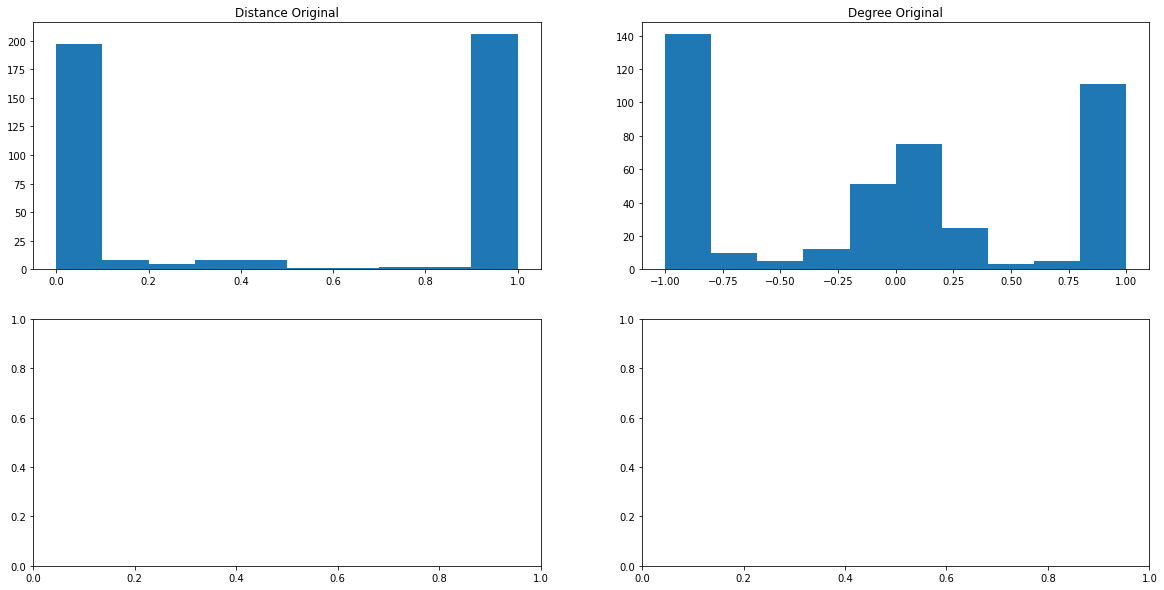

Dropped 38 samples. 400 samples remaining


In [4]:
end_label = True
train_generator = SamplerGenerator(settings, batch_size=settings['batch_size'], n_steps = 500, end_label=end_label)
val_generator = SamplerGenerator(settings, batch_size=settings['batch_size'], n_steps = 500, end_label=end_label, split = 'val')

In [43]:
results = []
for m_d in os.listdir('utils/models/regression'):
    if m_d.endswith('.py'):
        model_descr = m_d.split('.')[0]
        print(model_descr)
        get_model = importlib.import_module('utils.models.regression.'+model_descr).get_model
        model = get_model(end_label, settings['targets'])
        history = train_model(model)
        acc = complete_eval(model)
        model.save('auto_models/'+model_descr+'_'+str(acc[-2])+'_'+str(acc[-1]))
        result = {'model_descr':model_descr, 'acc':acc, 'history':history.history}
        results.append(result)
   
pickle.dump(results, open('train_results.pkl', 'wb'))

conv
Epoch 1/100
26/26 [==============================] - 10s 381ms/step - loss: 0.8653 - distance_loss: 0.2312 - degree_loss: 0.6146 - distance_mae: 0.4735 - degree_mae: 0.6146 - val_loss: 0.8188 - val_distance_loss: 0.2235 - val_degree_loss: 0.5759 - val_distance_mae: 0.4645 - val_degree_mae: 0.5759
Epoch 2/100
26/26 [==============================] - 7s 286ms/step - loss: 0.7917 - distance_loss: 0.2229 - degree_loss: 0.5494 - distance_mae: 0.4649 - degree_mae: 0.5494 - val_loss: 0.7521 - val_distance_loss: 0.2099 - val_degree_loss: 0.5228 - val_distance_mae: 0.4497 - val_degree_mae: 0.5228
Epoch 3/100
26/26 [==============================] - 8s 321ms/step - loss: 0.7354 - distance_loss: 0.2152 - degree_loss: 0.5008 - distance_mae: 0.4562 - degree_mae: 0.5008 - val_loss: 0.7008 - val_distance_loss: 0.2004 - val_degree_loss: 0.4810 - val_distance_mae: 0.4383 - val_degree_mae: 0.4810
Epoch 4/100
26/26 [==============================] - 11s 434ms/step - loss: 0.6933 - distance_loss: 0.2

INFO:tensorflow:Assets written to: auto_models/conv_0.89_0.8725\assets


INFO:tensorflow:Assets written to: auto_models/conv_0.89_0.8725\assets


conv_gru
Epoch 1/100
26/26 [==============================] - 10s 358ms/step - loss: 0.9141 - distance_loss: 0.2349 - degree_loss: 0.6229 - distance_mae: 0.4786 - degree_mae: 0.6229 - val_loss: 0.8594 - val_distance_loss: 0.2327 - val_degree_loss: 0.5722 - val_distance_mae: 0.4748 - val_degree_mae: 0.5722
Epoch 2/100
26/26 [==============================] - 7s 263ms/step - loss: 0.8630 - distance_loss: 0.2341 - degree_loss: 0.5758 - distance_mae: 0.4777 - degree_mae: 0.5758 - val_loss: 0.8092 - val_distance_loss: 0.2307 - val_degree_loss: 0.5268 - val_distance_mae: 0.4729 - val_degree_mae: 0.5268
Epoch 3/100
26/26 [==============================] - 6s 218ms/step - loss: 0.7974 - distance_loss: 0.2335 - degree_loss: 0.5134 - distance_mae: 0.4770 - degree_mae: 0.5134 - val_loss: 0.7251 - val_distance_loss: 0.2282 - val_degree_loss: 0.4475 - val_distance_mae: 0.4703 - val_degree_mae: 0.4475
Epoch 4/100
26/26 [==============================] - 7s 238ms/step - loss: 0.6879 - distance_loss: 

INFO:tensorflow:Assets written to: auto_models/conv_gru_0.9525_0.92\assets


INFO:tensorflow:Assets written to: auto_models/conv_gru_0.9525_0.92\assets


conv_lstm
Epoch 1/100
26/26 [==============================] - 7s 225ms/step - loss: 0.9646 - distance_loss: 0.2349 - degree_loss: 0.6071 - distance_mae: 0.4783 - degree_mae: 0.6071 - val_loss: 0.8772 - val_distance_loss: 0.2260 - val_degree_loss: 0.5326 - val_distance_mae: 0.4660 - val_degree_mae: 0.5326
Epoch 2/100
26/26 [==============================] - 5s 211ms/step - loss: 0.7966 - distance_loss: 0.2331 - degree_loss: 0.4476 - distance_mae: 0.4748 - degree_mae: 0.4476 - val_loss: 0.6871 - val_distance_loss: 0.2243 - val_degree_loss: 0.3494 - val_distance_mae: 0.4646 - val_degree_mae: 0.3494
Epoch 3/100
26/26 [==============================] - 7s 272ms/step - loss: 0.6602 - distance_loss: 0.2328 - degree_loss: 0.3159 - distance_mae: 0.4749 - degree_mae: 0.3159 - val_loss: 0.6140 - val_distance_loss: 0.2198 - val_degree_loss: 0.2840 - val_distance_mae: 0.4571 - val_degree_mae: 0.2840
Epoch 4/100
26/26 [==============================] - 7s 268ms/step - loss: 0.6076 - distance_loss: 

INFO:tensorflow:Assets written to: auto_models/conv_lstm_0.97_0.945\assets


INFO:tensorflow:Assets written to: auto_models/conv_lstm_0.97_0.945\assets


conv_rnn
Epoch 1/100
26/26 [==============================] - 7s 232ms/step - loss: 0.7648 - distance_loss: 0.2351 - degree_loss: 0.4746 - distance_mae: 0.4781 - degree_mae: 0.4746 - val_loss: 0.6198 - val_distance_loss: 0.2304 - val_degree_loss: 0.3345 - val_distance_mae: 0.4722 - val_degree_mae: 0.3345
Epoch 2/100
26/26 [==============================] - 6s 225ms/step - loss: 0.5833 - distance_loss: 0.2334 - degree_loss: 0.2949 - distance_mae: 0.4761 - degree_mae: 0.2949 - val_loss: 0.5700 - val_distance_loss: 0.2302 - val_degree_loss: 0.2849 - val_distance_mae: 0.4714 - val_degree_mae: 0.2849
Epoch 3/100
26/26 [==============================] - 6s 223ms/step - loss: 0.5341 - distance_loss: 0.2299 - degree_loss: 0.2494 - distance_mae: 0.4717 - degree_mae: 0.2494 - val_loss: 0.5052 - val_distance_loss: 0.2224 - val_degree_loss: 0.2280 - val_distance_mae: 0.4622 - val_degree_mae: 0.2280
Epoch 4/100
26/26 [==============================] - 6s 225ms/step - loss: 0.5088 - distance_loss: 0

INFO:tensorflow:Assets written to: auto_models/conv_rnn_0.9625_0.89\assets


INFO:tensorflow:Assets written to: auto_models/conv_rnn_0.9625_0.89\assets


dense
Epoch 1/100
26/26 [==============================] - 1s 17ms/step - loss: 0.9125 - distance_loss: 0.2385 - degree_loss: 0.6279 - distance_mae: 0.4778 - degree_mae: 0.6279 - val_loss: 0.8590 - val_distance_loss: 0.2379 - val_degree_loss: 0.5751 - val_distance_mae: 0.4772 - val_degree_mae: 0.5751
Epoch 2/100
26/26 [==============================] - 0s 10ms/step - loss: 0.8343 - distance_loss: 0.2334 - degree_loss: 0.5550 - distance_mae: 0.4729 - degree_mae: 0.5550 - val_loss: 0.7954 - val_distance_loss: 0.2323 - val_degree_loss: 0.5172 - val_distance_mae: 0.4715 - val_degree_mae: 0.5172
Epoch 3/100
26/26 [==============================] - 0s 10ms/step - loss: 0.7798 - distance_loss: 0.2331 - degree_loss: 0.5008 - distance_mae: 0.4726 - degree_mae: 0.5008 - val_loss: 0.7484 - val_distance_loss: 0.2288 - val_degree_loss: 0.4736 - val_distance_mae: 0.4679 - val_degree_mae: 0.4736
Epoch 4/100
26/26 [==============================] - 0s 10ms/step - loss: 0.7280 - distance_loss: 0.2286 -

INFO:tensorflow:Assets written to: auto_models/dense_0.6575_0.8275\assets


gru
Epoch 1/100
26/26 [==============================] - 2s 30ms/step - loss: 0.9076 - distance_loss: 0.2350 - degree_loss: 0.6483 - distance_mae: 0.4783 - degree_mae: 0.6483 - val_loss: 0.9123 - val_distance_loss: 0.2336 - val_degree_loss: 0.6546 - val_distance_mae: 0.4752 - val_degree_mae: 0.6546
Epoch 2/100
26/26 [==============================] - 1s 19ms/step - loss: 0.9024 - distance_loss: 0.2346 - degree_loss: 0.6439 - distance_mae: 0.4780 - degree_mae: 0.6439 - val_loss: 0.9071 - val_distance_loss: 0.2334 - val_degree_loss: 0.6501 - val_distance_mae: 0.4752 - val_degree_mae: 0.6501
Epoch 3/100
26/26 [==============================] - 1s 20ms/step - loss: 0.8981 - distance_loss: 0.2343 - degree_loss: 0.6404 - distance_mae: 0.4775 - degree_mae: 0.6404 - val_loss: 0.9002 - val_distance_loss: 0.2332 - val_degree_loss: 0.6438 - val_distance_mae: 0.4750 - val_degree_mae: 0.6438
Epoch 4/100
26/26 [==============================] - 1s 20ms/step - loss: 0.8932 - distance_loss: 0.2338 - d

INFO:tensorflow:Assets written to: auto_models/gru_0.4975_0.8625\assets


INFO:tensorflow:Assets written to: auto_models/gru_0.4975_0.8625\assets


lstm
Epoch 1/100
26/26 [==============================] - 2s 36ms/step - loss: 0.9068 - distance_loss: 0.2352 - degree_loss: 0.6467 - distance_mae: 0.4788 - degree_mae: 0.6467 - val_loss: 0.9060 - val_distance_loss: 0.2333 - val_degree_loss: 0.6481 - val_distance_mae: 0.4753 - val_degree_mae: 0.6481
Epoch 2/100
26/26 [==============================] - 1s 21ms/step - loss: 0.8982 - distance_loss: 0.2346 - degree_loss: 0.6392 - distance_mae: 0.4781 - degree_mae: 0.6392 - val_loss: 0.8928 - val_distance_loss: 0.2333 - val_degree_loss: 0.6353 - val_distance_mae: 0.4753 - val_degree_mae: 0.6353
Epoch 3/100
26/26 [==============================] - 1s 22ms/step - loss: 0.8646 - distance_loss: 0.2343 - degree_loss: 0.6063 - distance_mae: 0.4776 - degree_mae: 0.6063 - val_loss: 0.7804 - val_distance_loss: 0.2361 - val_degree_loss: 0.5204 - val_distance_mae: 0.4776 - val_degree_mae: 0.5204
Epoch 4/100
26/26 [==============================] - 1s 21ms/step - loss: 0.7965 - distance_loss: 0.2338 - 

INFO:tensorflow:Assets written to: auto_models/lstm_0.555_0.86\assets


INFO:tensorflow:Assets written to: auto_models/lstm_0.555_0.86\assets


rnn
Epoch 1/100
26/26 [==============================] - 3s 73ms/step - loss: 0.9566 - distance_loss: 0.2453 - degree_loss: 0.6874 - distance_mae: 0.4744 - degree_mae: 0.6874 - val_loss: 0.9795 - val_distance_loss: 0.2460 - val_degree_loss: 0.7095 - val_distance_mae: 0.4753 - val_degree_mae: 0.7095
Epoch 2/100
26/26 [==============================] - 1s 57ms/step - loss: 0.8887 - distance_loss: 0.2339 - degree_loss: 0.6308 - distance_mae: 0.4649 - degree_mae: 0.6308 - val_loss: 0.9696 - val_distance_loss: 0.2452 - val_degree_loss: 0.7006 - val_distance_mae: 0.4758 - val_degree_mae: 0.7006
Epoch 3/100
26/26 [==============================] - 2s 58ms/step - loss: 0.8586 - distance_loss: 0.2271 - degree_loss: 0.6076 - distance_mae: 0.4589 - degree_mae: 0.6076 - val_loss: 0.9868 - val_distance_loss: 0.2453 - val_degree_loss: 0.7176 - val_distance_mae: 0.4755 - val_degree_mae: 0.7176
Epoch 4/100
26/26 [==============================] - 2s 61ms/step - loss: 0.8337 - distance_loss: 0.2228 - d

INFO:tensorflow:Assets written to: auto_models/rnn_0.5225_0.72\assets


In [42]:
 def train_model(model,epochs = 100):
    lr_schedule = keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=1e-4,
        decay_steps=30,
        decay_rate=0.98
        )
    opt = keras.optimizers.Adam(learning_rate=lr_schedule) 

    distance_loss = tf.keras.losses.MeanSquaredError(
        name="distance_loss",
    )

    degree_loss =tf.keras.losses.MeanAbsoluteError(
        name="degree_loss"
    )
    lossWeights = {"distance": 1.0, "degree": 1.0}


    
    model.compile(optimizer=opt,
            loss={'distance': distance_loss, 'degree' :degree_loss},
            loss_weights=lossWeights,
            metrics={'distance':'mae', 'degree': 'mae'}
            )
    history = model.fit(train_generator,
                        validation_data=val_generator,
                        batch_size=settings['batch_size'],
                        epochs=epochs,
                    )
    return history

In [9]:
model.save('models/conv_lstm_regression')

INFO:tensorflow:Assets written to: models/conv_lstm_regression\assets


INFO:tensorflow:Assets written to: models/conv_lstm_regression\assets


In [14]:
def evaluate(model, generator, log = False):

    correct = 0
    for batch in generator:
        x, y = batch
        distance_true = y["distance"]
        y_pred = model.predict(x)
        distance_pred = y_pred[0]
        for i in range(len(distance_true)):
            if (
                distance_true[i] < settings["thresholds"]["gas"]
                and distance_pred[i] < settings["thresholds"]["gas"]
            ):
                correct += 1
            elif (
                distance_true[i] > settings["thresholds"]["gas"]
                and distance_pred[i] > settings["thresholds"]["gas"]
            ):
                correct += 1
    distance_accuracy = (correct / (len(generator)*settings['batch_size']))
    if log:
        print(f'Distance accuracy: {distance_accuracy} ')

    correct = 0
    for batch in generator:
        x, y = batch
        degree_true = y["degree"]
        y_pred = model.predict(x)
        degree_pred = y_pred[1]
        for i in range(len(degree_true)):
            if degree_true[i]>=settings["thresholds"]["left"] and degree_true[i]<=settings["thresholds"]["right"] and degree_pred[i]>=settings["thresholds"]["left"] and degree_pred[i]<=settings["thresholds"]["right"]:
                correct += 1
            elif degree_true[i]<settings["thresholds"]["left"] and degree_pred[i]<settings["thresholds"]["left"]:
                correct += 1
            elif degree_true[i]>settings["thresholds"]["right"] and degree_pred[i]>settings["thresholds"]["right"]:
                correct += 1
    
    degree_accuracy = (correct / (len(generator)*settings['batch_size']))
    if log:
        print(f'Degree accuracy: {degree_accuracy} ')
    return distance_accuracy, degree_accuracy

#print("Train generator")
#train_distance_accuracy, train_degree_accuracy = evaluate(train_generator)
#print("Val generator")
#val_distance_accuracy, val_degree_accuracy = evaluate(val_generator)

def complete_eval(model):
    train_distance_accuracy, train_degree_accuracy = evaluate(model, train_generator)
    val_distance_accuracy, val_degree_accuracy = evaluate(model, val_generator)
    return np.array([train_distance_accuracy, train_degree_accuracy, val_distance_accuracy, val_degree_accuracy])


# result = complete_eval(model)
# print(result)